In [15]:
import numpy as np
import pandas as pd
import sportsdataverse
1+1

2

In [29]:
s1 = pd.read_csv("2017_games.csv")
s2 = pd.read_csv("2018_games.csv")
s3 = pd.read_csv("2019_games.csv")
s4 = pd.read_csv("2020_games.csv")
s5 = pd.read_csv("2022_games.csv")

In [32]:
seasons = pd.concat([s1,s2,s3,s4,s5], axis=0)

In [35]:
games = seasons['game_id'].unique()
games

array([400947325, 400947450, 400946811, ..., 401370017, 401372833,
       401371355], dtype=int64)

In [37]:
train_games = np.random.choice(games, size=int(0.75 * len(games)), replace=False)

In [38]:
train = seasons[seasons['game_id'].isin(train_games)]
test = seasons[~seasons['game_id'].isin(train_games)]

<Axes: xlabel='game_id', ylabel='home_score'>

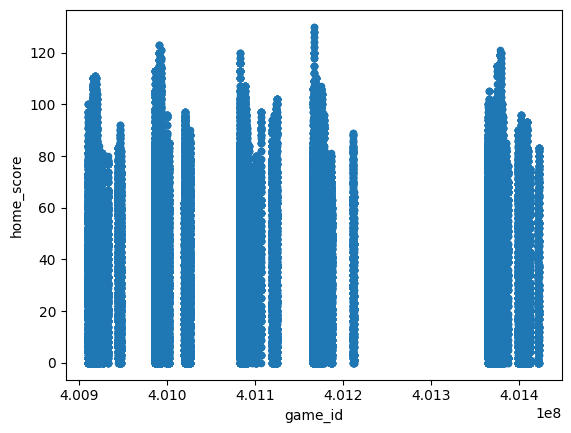

In [49]:
train.plot.scatter('game_id', 'home_score')

In [40]:
X_train = train.drop(['game_id', 'away_score','home_score','year', 'home_win'], axis=1)  # Assuming 'home_win' is the target variable
y_train = train['home_win']

In [64]:
X_test = test.drop(['game_id', 'away_score','home_score','year', 'home_win'], axis=1)
y_test = test['home_win']

In [46]:
X_train.head(100)

,Unnamed: 0,score_difference,seconds_remaining,possession
0,8717,0,2400.0,1
1,8718,0,2383.0,1
2,8719,0,2383.0,0
3,8720,0,2363.0,0
4,8721,0,2363.0,1
...,...,...,...,...
95,8814,-2,1631.0,0
96,8815,-2,1631.0,1
97,8816,-2,1622.0,0
98,8818,-2,1622.0,1


In [77]:
from sklearn.linear_model import LogisticRegression

In [80]:
log_reg = LogisticRegression()

In [81]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [82]:
pred = log_reg.predict(X_test)


In [83]:
print(pred)
print(y_test)

[1. 1. 1. ... 1. 1. 1.]
1186      1.0
1187      1.0
1188      1.0
1189      1.0
1190      1.0
         ... 
119406    1.0
119407    1.0
119408    1.0
119409    1.0
119410    1.0
Name: home_win, Length: 156392, dtype: float64


In [84]:
lin_reg.score(X_test, y_test)

0.7814977748222416

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(y_test, pred)

0.7814977748222416